## Matplotlib 다양한 플롯

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mpl.rcParams['axes.unicode_minus'] = False 
plt.rcParams["font.family"] = 'Malgun Gothic'

### 1. Bar Chart
- x 데이터가 카테고리 값인 경우

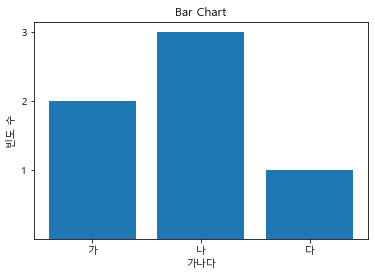

In [4]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

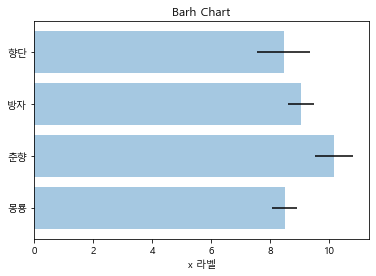

In [5]:
np.random.seed(0)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')
plt.show()

In [6]:
# 타이타닉 데이터 - 선실별 승객수
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [9]:
df = titanic[['class','pclass']].groupby('class').count()
df

,pclass
class,
First,216
Second,184
Third,491


In [12]:
y = df.pclass.values
y

array([216, 184, 491], dtype=int64)

In [13]:
x = np.arange(len(y))
xlabel = df.index.tolist()
xlabel

['First', 'Second', 'Third']

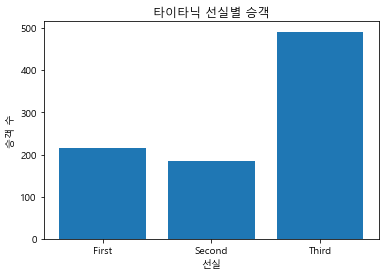

In [15]:
plt.title('타이타닉 선실별 승객')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel("선실")
plt.ylabel("승객 수")
plt.show()

### 2. 파이 차트
- 카테고리 별 값의 상대적인 비교

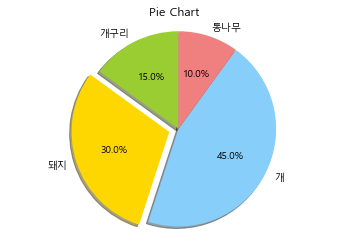

In [17]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

### 3. 히스토그램

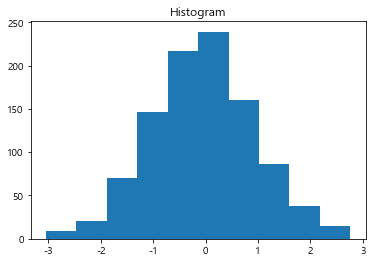

In [18]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10)
plt.show()

In [19]:
# 빈도 수
arrays

array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.])

In [20]:
bins

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

### 4. 산점도(Scatter Plot)
- 두 개의 실수 데이터 집합의 상관관계를 살펴볼 때 사용

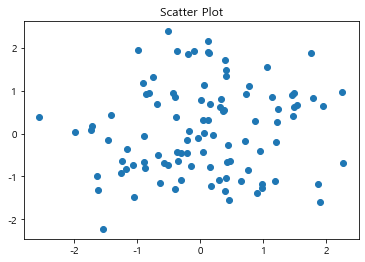

In [23]:
np.random.seed(0)
X = np.random.randn(100)
Y = np.random.randn(100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

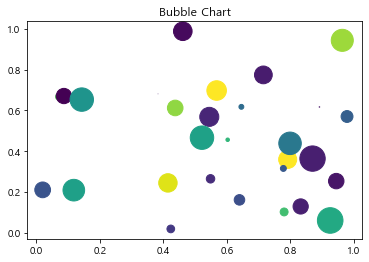

In [24]:
N = 30
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N))**2
plt.title("Bubble Chart")
plt.scatter(x, y1, c=y2, s=y3)  # c - color, s - size
plt.show()

- Anscombe's Quartet

In [25]:
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [26]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [27]:
ans.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [28]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [29]:
ans[ans.dataset == 'I']

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


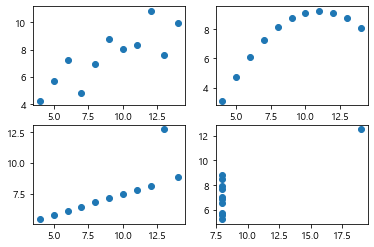

In [38]:
fig, axes = plt.subplots(2, 2)
for index, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]
    ax.scatter(ds.x, ds.y)

plt.show()

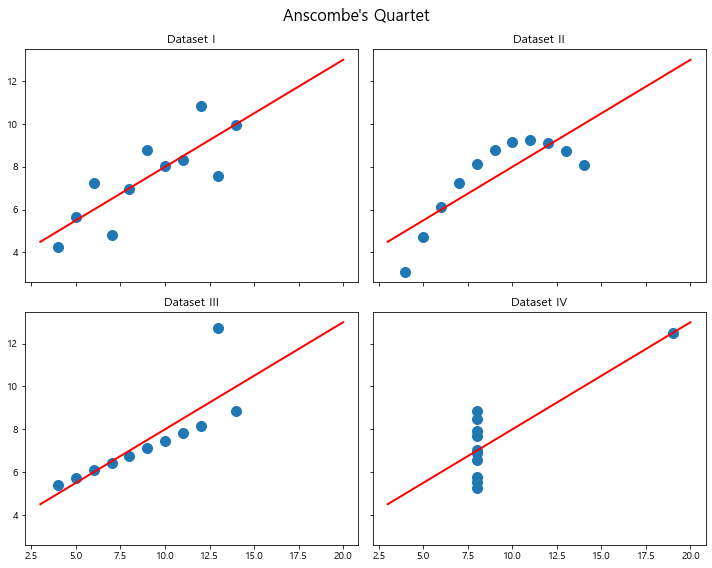

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(10,8),
                         sharex=True, sharey=True)
for index, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]
    ax.plot(ds.x, ds.y, 'o', markersize=10)
    ax.plot([3, 20], [4.5, 13], 'r-', lw=2) # y = 0.5 * x + 3
    ax.set_title(f'Dataset {roman}')

fig.suptitle("Anscombe's Quartet", fontsize=16)
plt.tight_layout()
plt.show()

### 5. Imshow

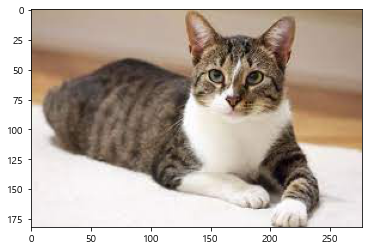

In [50]:
import matplotlib.image as img 

image = img.imread('/Temp/cat.jpg')
plt.imshow(image)
plt.show()

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

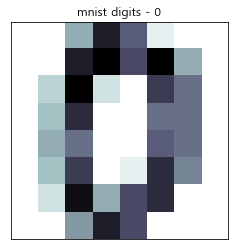

In [54]:
plt.title("mnist digits - 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
#plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()